In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()
%matplotlib inline

In [3]:
def StockPriceSim(S0,K,r,sigma, N_sim, T, dt):
    N_T = int(T/dt)
    t = np.linspace(0,T,N_T+1)
    
    # Generate paths for underlying asset prices
    innovation = np.random.randn(N_sim, N_T)
    BM = np.zeros([N_sim, N_T+1])
    BM[:,0] = 0
    BM[:,1:] = innovation
    BM = np.cumsum(BM,axis=1)
    BM *= np.sqrt(dt)

    S = np.ones([N_sim, N_T+1])
    S[:,0] = 0
    S = S.cumsum(axis=1)
    S *= (r - 0.5*(sigma)**2)*dt
    S += sigma * BM
    S = S0*np.exp(S)
    
    return S

In [4]:
S0=100
K=100
r=0.04
sigma=0.3
N_sim=10
T=1
dt=0.1
stock = StockPriceSim(S0,K,r,sigma,N_sim,T,dt)

Text(0.5, 1.0, 'Simualted Stock Price')

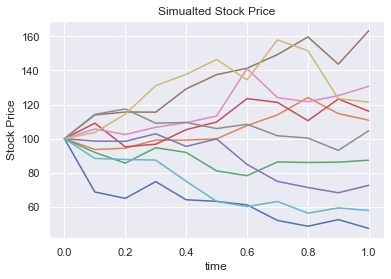

In [5]:
N_T = int(T/dt)
t = np.linspace(0,T,N_T+1)

for i in range(N_sim):
    plt.plot(t, stock[i,:])
plt.xlabel('time')
plt.ylabel('Stock Price')
plt.title('Simualted Stock Price')

In [6]:
def option_price_MC(S0,K,sigma,r,T,N_sim=1000):
    dt = T
    stock = StockPriceSim(S0,K,r,sigma, N_sim, T, dt)
    stock = stock[:, -1]  # only need terminal prices for European Option
    option_price = np.maximum(stock - K, 0)*np.exp(-r*T)
    return np.mean(option_price)

In [7]:
option_price_MC(S0,K,sigma,r,T)

13.702121387847379

In [8]:
def option_price_BS(S0,K,sigma,r,T):
    d1 = (np.log(S0/K) + (r + 0.5*(sigma**2))*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [9]:
BS_price=option_price_BS(S0,K,sigma,r,T)

In [10]:
log_n = [2,2.5,3,3.5,4,4.5,5,5.5,6]
n_sim = [int(10**k) for k in log_n] 

In [13]:
option_price_sim = [option_price_MC(S0,K,sigma,r,T,N_sim) for N_sim in n_sim]

Text(0.5, 1.0, 'Option Price: Monte Carlo vs. Black Scholes')

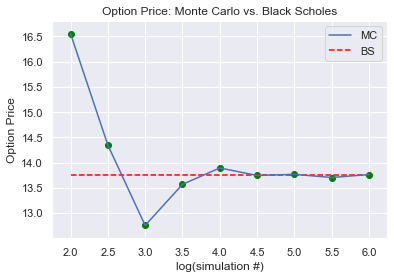

In [15]:
plt.plot(log_n, option_price_sim,label='MC')
plt.scatter(log_n, option_price_sim, color='green')
plt.hlines(BS_price, 2,6, linestyles='dashed', colors='red',label='BS')
plt.xlabel('log(simulation #)')
plt.ylabel('Option Price')
plt.legend()
plt.title('Option Price: Monte Carlo vs. Black Scholes')

In [10]:
np.mean(np.maximum(stock[:,-1]-K,0)*np.exp(-r*T))

11.481020485318567